In [1]:
import numpy as np
from fastai import *
from fastai.vision import *
import torch
import os
from torchvision import transforms

**data from https://www.kaggle.com/mloey1/ahcd1**

In [2]:
data_path = Path('data')

In [3]:
test_x = np.genfromtxt(data_path/'csvTestImages 3360x1024.csv', delimiter=',')
test_y = np.genfromtxt(data_path/'csvTestLabel 3360x1.csv', delimiter=',')
test_y = test_y.astype(int) - 1
test_x = test_x.astype(float)


test_x.shape, test_y.shape, test_x[0].shape, test_y.max(), test_y.min(), max(test_x.max(axis=1))

((3360, 1024), (3360,), (1024,), 27, 0, 255.0)

In [4]:
class ArabicMnist(Dataset):
    def __init__(self, X, y=None):
        super().__init__()
        self.classes = np.unique(y)
        self.c = len(np.unique(y))
        self.X = X
        if y is not None: self.y = y

    def __getitem__(self, i):
        image = self.X[i]
        arr = (image - image.mean()) / image.std() # normalizes between -1 and +1
        arr = (arr + 1) / 2 * 255 # moves it between 0 and 255
        arr /= 255.0   ### WITH RANGE [0 ... 1]
#         arr = np.clip(arr, 0, 255).astype(np.uint8),
        arr3D = np.tile(arr[..., None], 3)
#         arr3D = 256 - arr3D
        arr3D = np.transpose(arr3D, (2, 1, 0))
        new_tensor = torch.from_numpy(arr3D).float()
        return (new_tensor, self.y[i])
    
    def __len__(self): return len(self.X)

In [5]:
test_x_reshaped = test_x.reshape([-1, 32, 32])

In [6]:
test_x_reshaped.shape, test_y.shape

((3360, 32, 32), (3360,))

In [7]:
AM = ArabicMnist(test_x_reshaped[:2720], test_y[:2720])
AMV = ArabicMnist(test_x_reshaped[2720:], test_y[2720:])

In [8]:
data = DataBunch.create(AM, AMV, bs=8)

In [9]:
img1 = data.train_ds[0]
img1

(tensor([[[0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          ...,
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682]],
 
         [[0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          ...,
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682]],
 
         [[0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ..., 0.3682, 0.3682, 0.3682],
          [0.3682, 0.3682, 0.3682,  ...,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


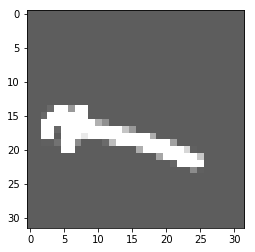

In [10]:
plt.imshow(np.transpose(img1[0], (2, 1, 0)))

In [11]:
learn = create_cnn(data, models.resnet18, metrics=error_rate)

In [12]:
# %%debug
learn.fit(3, 1e-9)

Total time: 00:30
epoch  train_loss  valid_loss  error_rate
1      -0.050481   -0.087398   0.951563    (00:10)
2      0.023616    -0.001692   0.971875    (00:09)
3      0.063470    -0.065271   0.954687    (00:09)



In [13]:
class ArabicMnist(Dataset):
    def __init__(self, X, y=None):
        super().__init__()
        self.classes = np.unique(y)
        self.c = len(np.unique(y))
        self.X = X
        if y is not None: self.y = y

    def __getitem__(self, i):
        image = self.X[i]
        arr = (image - image.mean()) / image.std() # normalizes between -1 and +1
        arr = (arr + 1) / 2 * 255 # moves it between 0 and 255
#         arr /= 255.0  ## WITH RANGE [0, 255]
#         arr = np.clip(arr, 0, 255).astype(np.uint8),
        arr3D = np.tile(arr[..., None], 3)
#         arr3D = 256 - arr3D
        arr3D = np.transpose(arr3D, (2, 1, 0))
        new_tensor = torch.from_numpy(arr3D).float()
        return (new_tensor, self.y[i])
    
    def __len__(self): return len(self.X)

In [14]:
AM = ArabicMnist(test_x_reshaped[:2720], test_y[:2720])
AMV = ArabicMnist(test_x_reshaped[2720:], test_y[2720:])

In [15]:
data = DataBunch.create(AM, AMV, bs=8)

In [16]:
learn = create_cnn(data, models.resnet18, metrics=error_rate)

In [17]:
# %%debug
learn.fit(3, 1e-9)

Total time: 00:29
epoch  train_loss  valid_loss  error_rate
1      0.005595    0.063722    0.970312    (00:09)
2      0.052280    -0.058503   0.956250    (00:09)
3      -0.036031   -0.035565   0.960938    (00:09)

